In [5]:
import torch
import numpy as np

from matplotlib import pyplot as plt

/home/jonas/miniconda3/envs/exphormer/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
ks = [1,2,3,5,10,20,30,50,100]

cifar10_performance = [74.37, 74.84, 74.75, 75.08, 75.05, 75.12, 75.08, 75.5, 75.65]
cifar10_std = [0.56, 0.41, .33, .27, .32, .31, .48, .43, .44]
cifar10_time = [135.3418787, 146.6369742, 146.50078180000003, 147.94249989999997,146.59979680000004, 142.28525770000002, 149.7010887, 166.9687559, 241.7953729]
assert len(cifar10_performance) == len(cifar10_std) == len(cifar10_time) == 9

pascal_performance = [35.57, 37.65, 37.47, 37.30, 36.58, 35.80, 37.15, 35.33]   # 100 missing
pascal_std = [1.06, .7, .48, .99, 1.5, 1.6, .73, .68]
pascal_time = [16.135655200000002, 15.60786333333333, 16.808163266666668, 17.124181666666665, 17.70223993333333, 22.577918000000004, 26.916184766666667, 58.096192300000006]
pascal_time_std = [.8962819243316267, 1.002017403236889, 1.4383523783356622, 0.7323055112202222, 0.793649643103329, 0.3809211936103334, 5.139131551308044]
# assert len(pascal_performance) == len(pascal_std) == len(pascal_time) == 9

peptides_performance = [60.64, 62.97, 63.13, 64.65, 65.10, 65.31, 65.14]
peptides_std = [1.13, .27, .65, .37, .42, .52, .76]
peptides_time = [9.2931019, 9.701920049999998, 10.054136600000001, 10.549371350000001, 12.7925014, 16.59700635, 21.399946499999995, 38.8262337]
peptides_time_std = [.28881344113789004, .17551002465749743, .19499785249393997, .25156922169267754, .26386876208404003, .3813230618676775, .45326441301825, .8352748790498099]
# assert len(peptides_performance) == len(peptides_std) == len(peptides_time) == 9

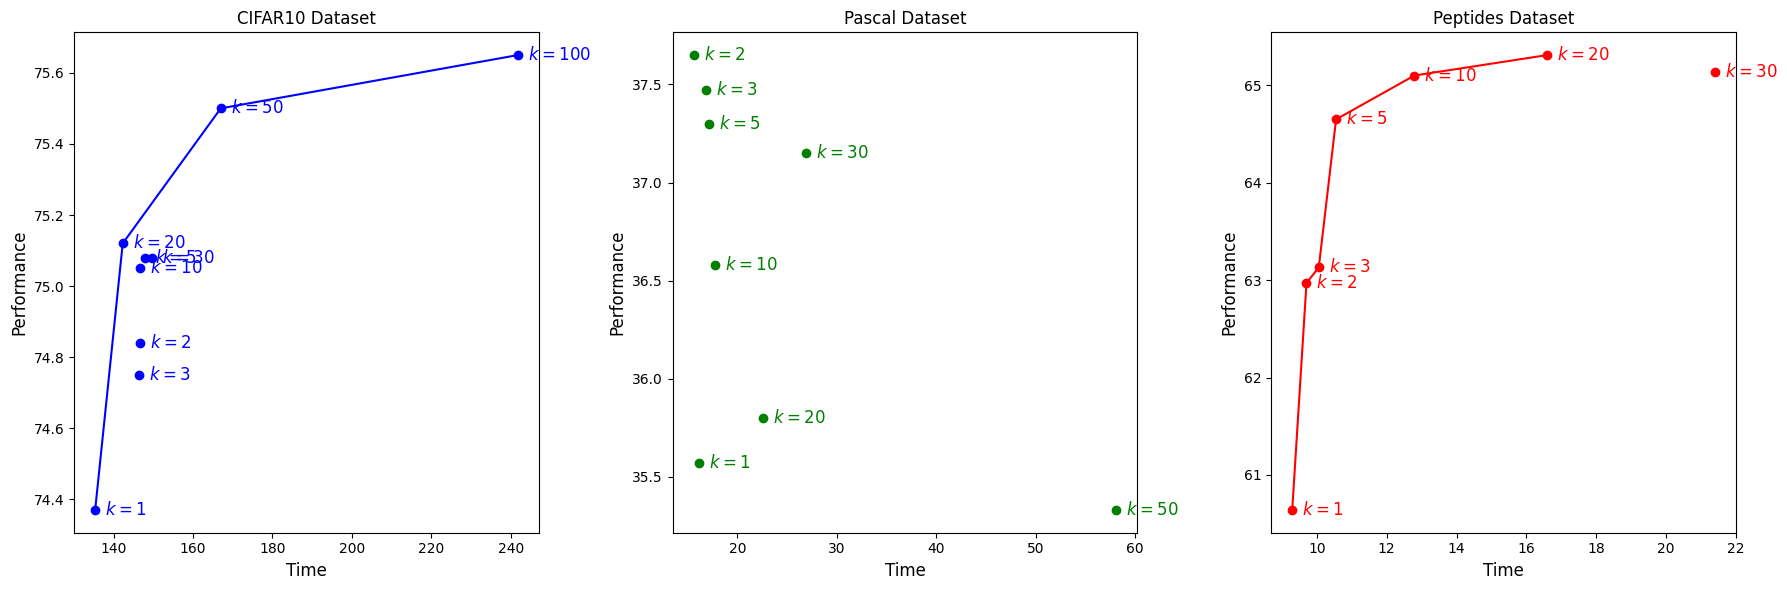

In [19]:
def find_pareto_optimal_idxs(time, performance):
    pareto_optimal_idxs = []
    assert len(time) == len(performance)
    for i in range(len(time)):
        is_pareto_optimal = True
        for j in range(len(time)):
            if time[j] < time[i] and performance[j] > performance[i]:
                is_pareto_optimal = False
                break
        if is_pareto_optimal:
            pareto_optimal_idxs.append(i)

    # sort by increasing time
    pareto_optimal_idxs = sorted(pareto_optimal_idxs, key=lambda idx: time[idx])
    
    return pareto_optimal_idxs

def plot_performance_time(ax, time, performance, ks, dataset_name, color):
    min_length = min(len(time), len(performance), len(ks))
    time = time[:min_length]
    performance = performance[:min_length]

    # draw points
    ax.scatter(time, performance, color=color)

    # draw pareto frontier
    pareto_optimal_idxs = find_pareto_optimal_idxs(time, performance)
    for i in range(1, len(pareto_optimal_idxs)):
        idx1 = pareto_optimal_idxs[i-1]
        idx2 = pareto_optimal_idxs[i]
        ax.plot([time[idx1], time[idx2]], [performance[idx1], performance[idx2]], color=color)

    min_time = min(time)

    for i in range(min_length):
        k = ks[i]
        ax.text(time[i], performance[i], f'$k={k}$', fontsize=12, color=color, ha='right', va='bottom')
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Performance', fontsize=12)
    ax.set_title(f'{dataset_name} Dataset')

# Create a figure and 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for CIFAR10 in the first subplot
plot_performance_time(axes[0], cifar10_time, cifar10_performance, ks, 'CIFAR10', 'blue')

# Plot for Pascal in the second subplot
plot_performance_time(axes[1], pascal_time, pascal_performance, ks, 'Pascal', 'green')

# Plot for Peptides in the third subplot
plot_performance_time(axes[2], peptides_time, peptides_performance, ks, 'Peptides', 'red')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()